In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Đọc file người dùng tải lên
file_path = "../data/extracted_features.csv"
df = pd.read_csv(file_path)

# Thông tin cơ bản
info = df.info()
head = df.head()
desc = df.describe()

print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       621 non-null    float64
 1   MDVP:Fhi(Hz)      621 non-null    float64
 2   MDVP:Flo(Hz)      621 non-null    float64
 3   MDVP:Jitter(%)    621 non-null    float64
 4   MDVP:Jitter(Abs)  621 non-null    float64
 5   MDVP:RAP          621 non-null    float64
 6   MDVP:PPQ          621 non-null    float64
 7   Jitter:DDP        621 non-null    float64
 8   MDVP:Shimmer      621 non-null    float64
 9   MDVP:Shimmer(dB)  621 non-null    float64
 10  Shimmer:APQ3      621 non-null    float64
 11  Shimmer:APQ5      621 non-null    float64
 12  MDVP:APQ          619 non-null    float64
 13  Shimmer:DDA       621 non-null    float64
 14  HNR               621 non-null    float64
 15  NHR               621 non-null    float64
 16  DFA               621 non-null    float64
 1

In [3]:
value_null = df.isnull().sum()
print(value_null)


MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            2
Shimmer:DDA         0
HNR                 0
NHR                 0
DFA                 0
D2                  0
spread1             0
spread2             0
PPE                 0
id                  0
class               0
dtype: int64


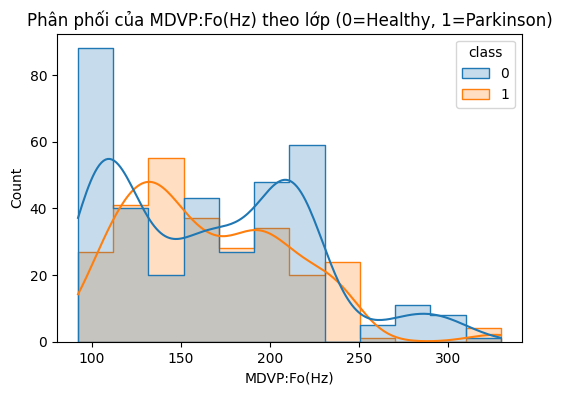

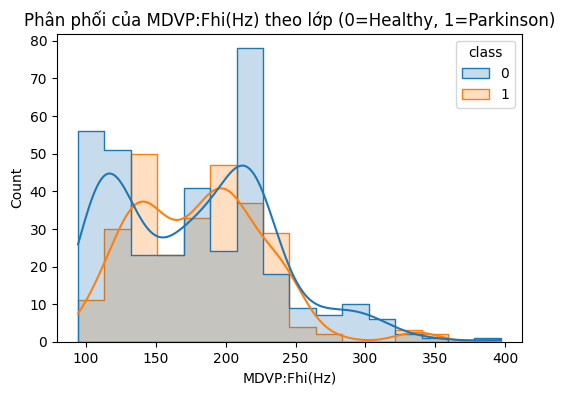

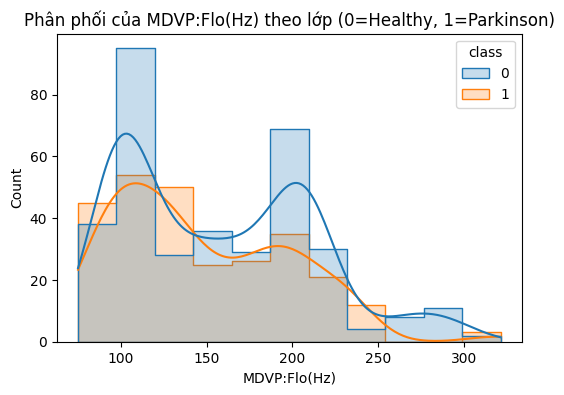

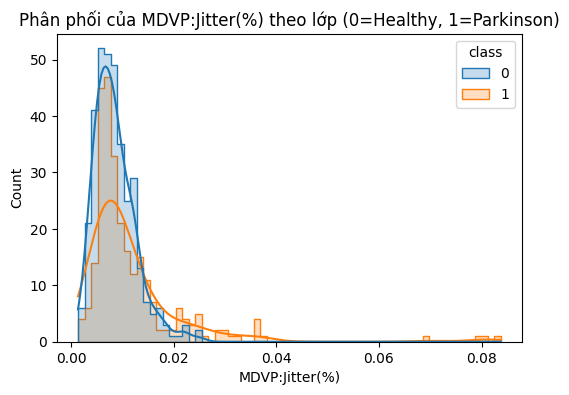

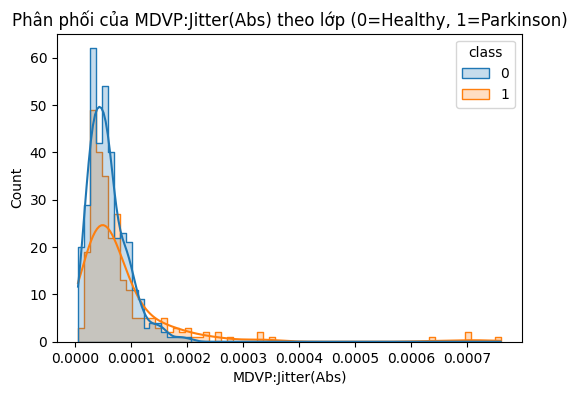

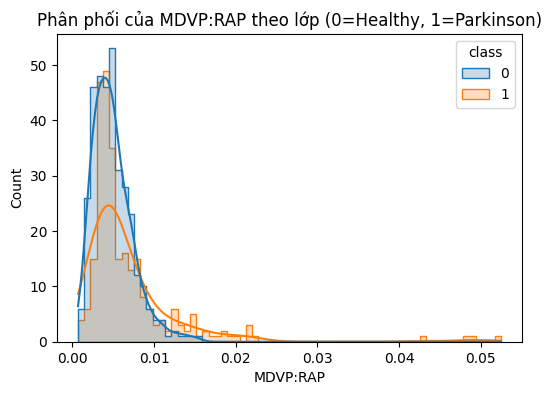

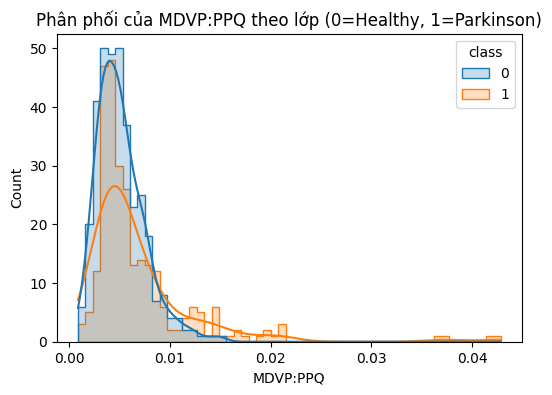

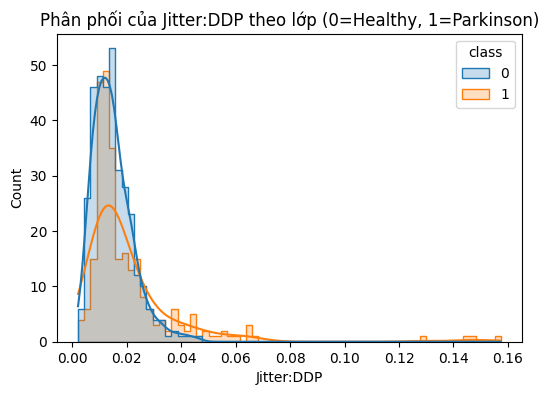

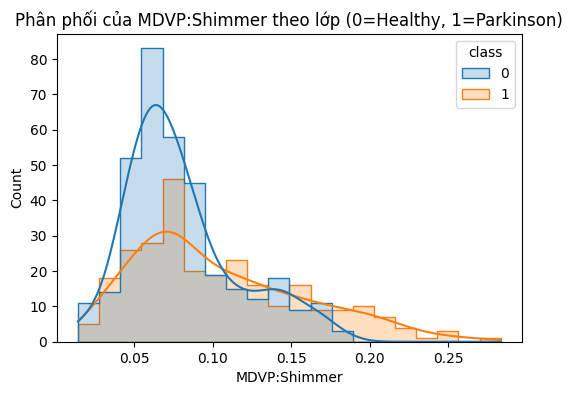

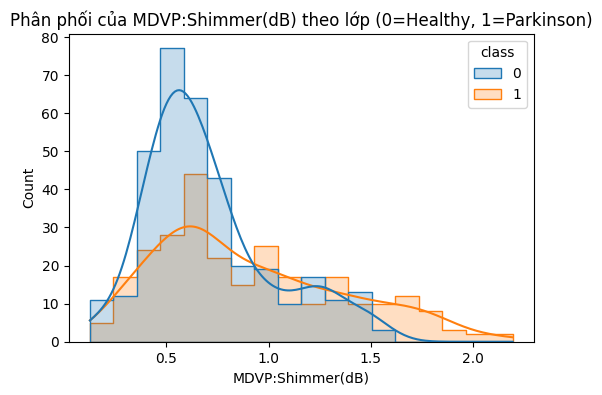

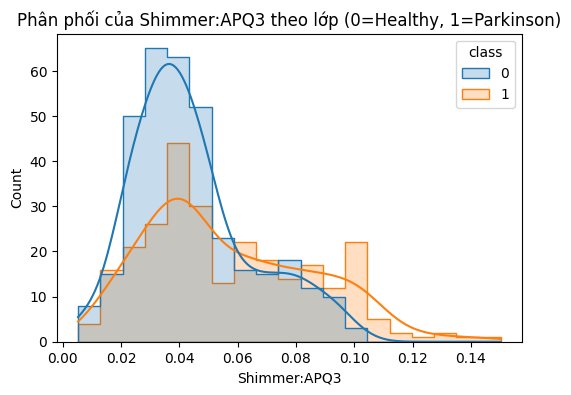

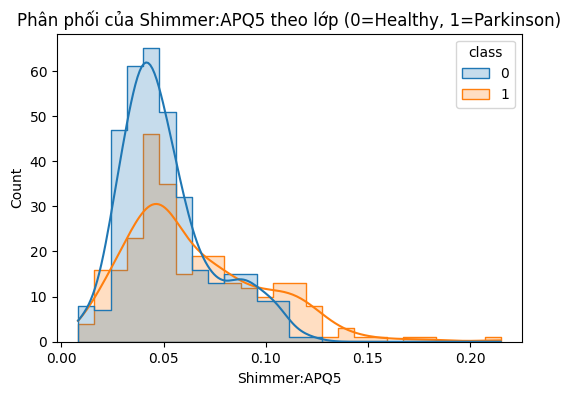

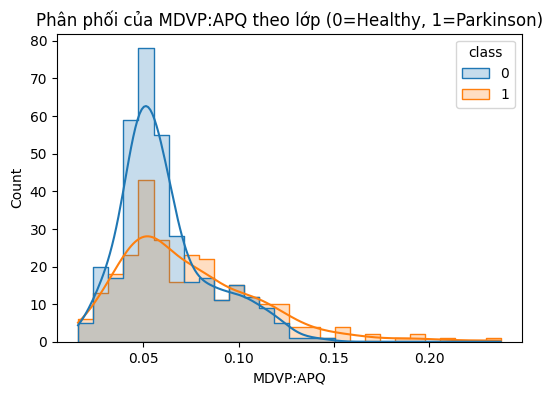

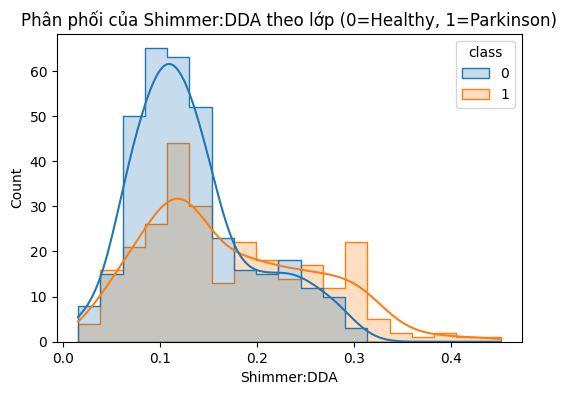

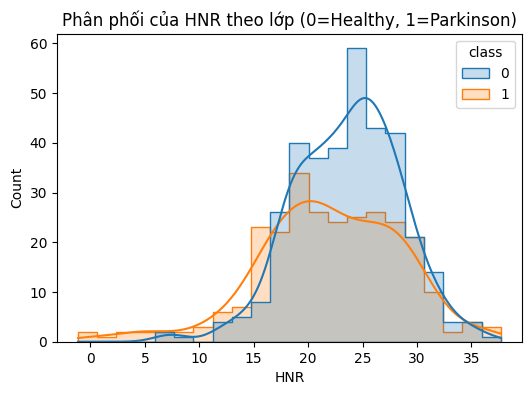

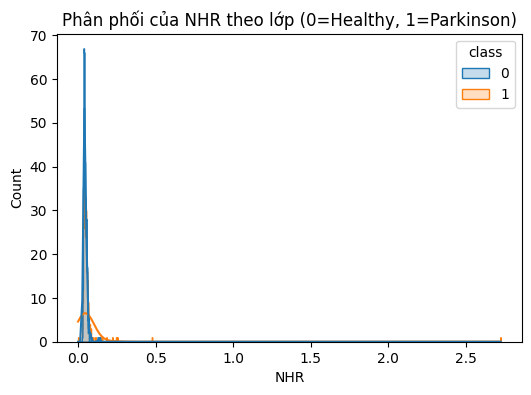

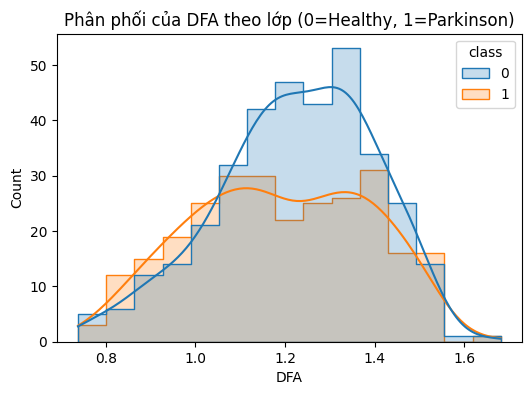

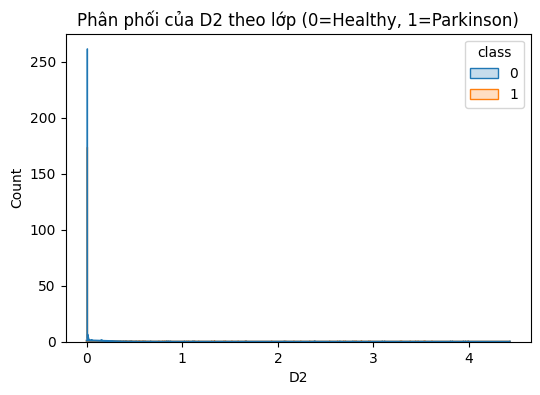

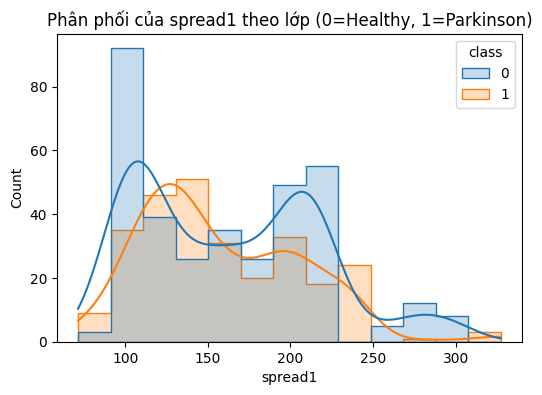

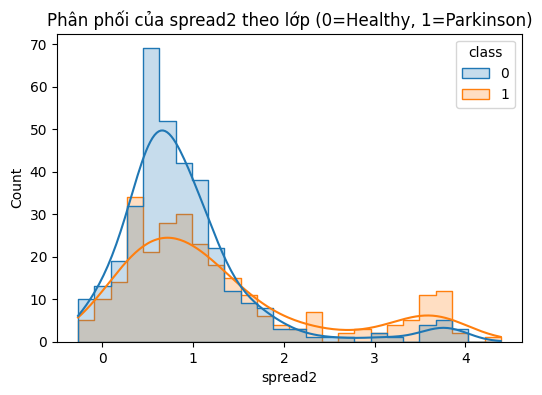

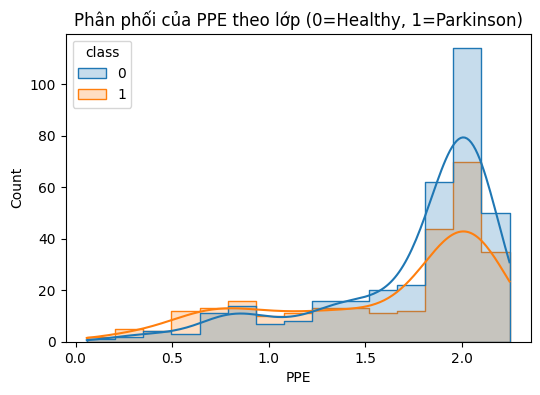

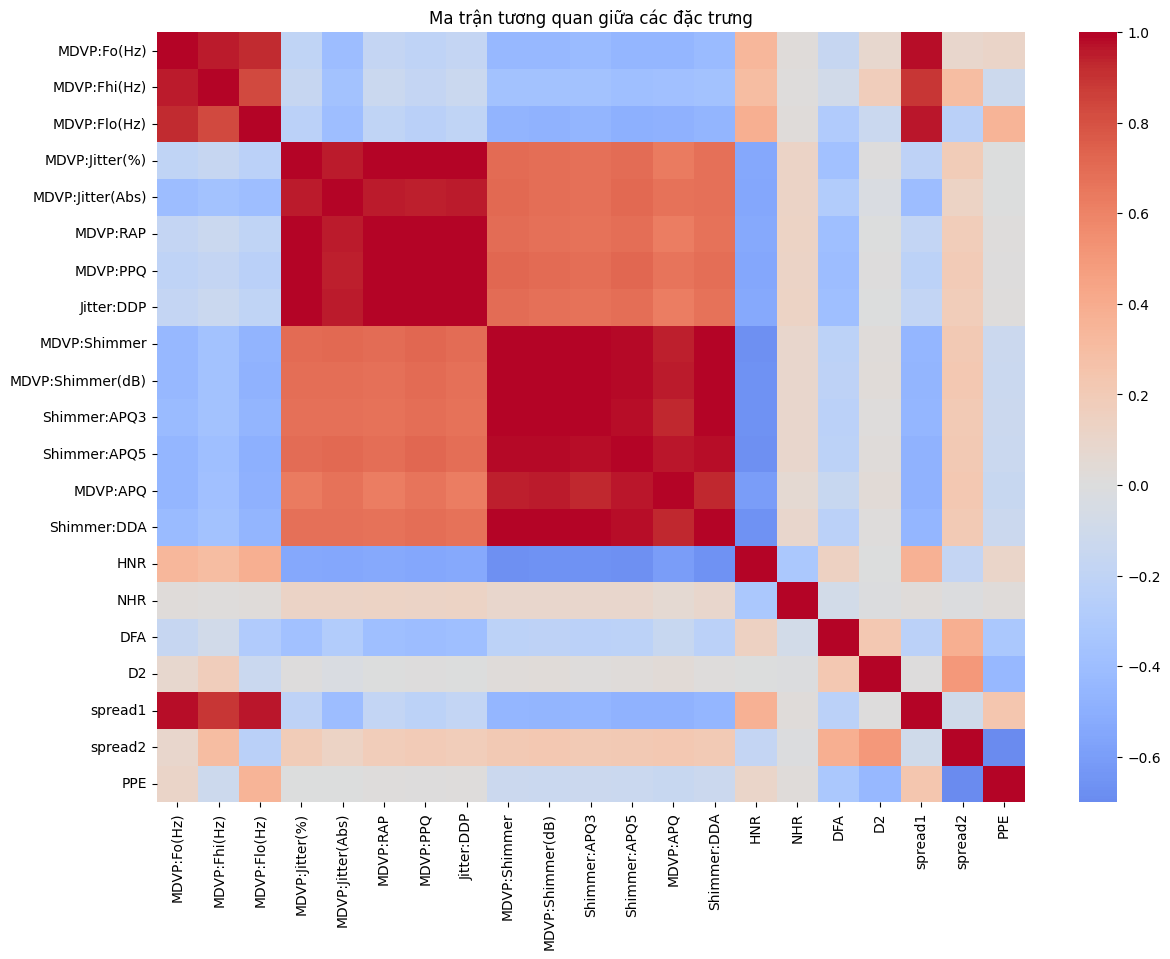

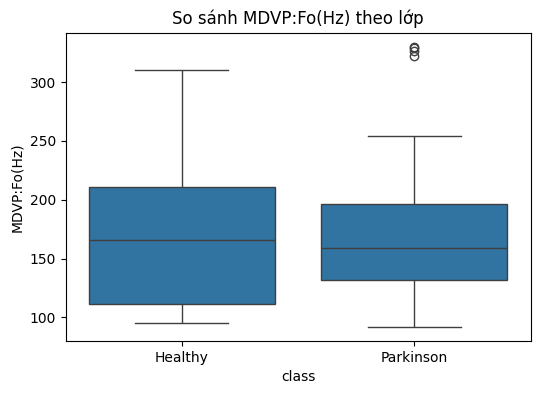

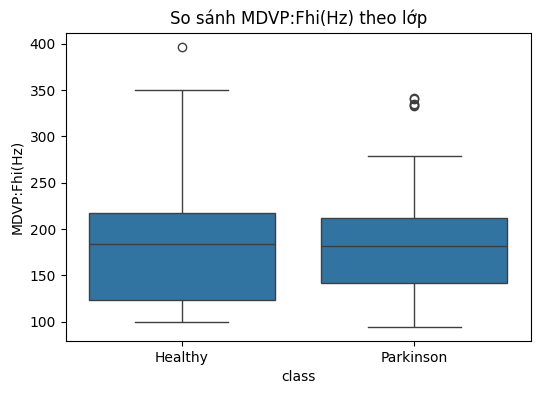

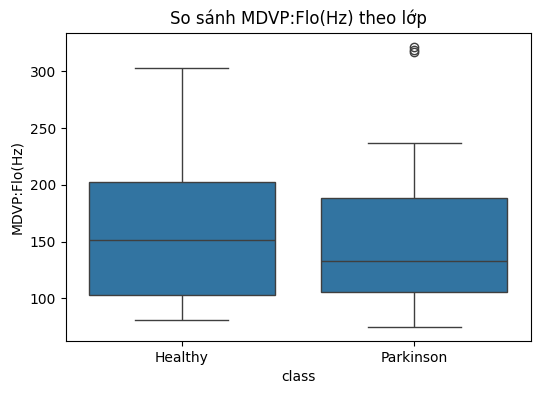

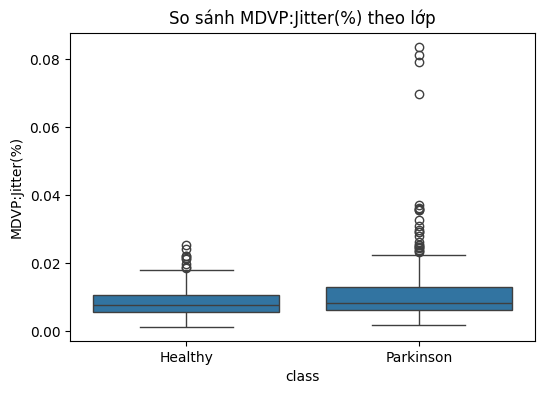

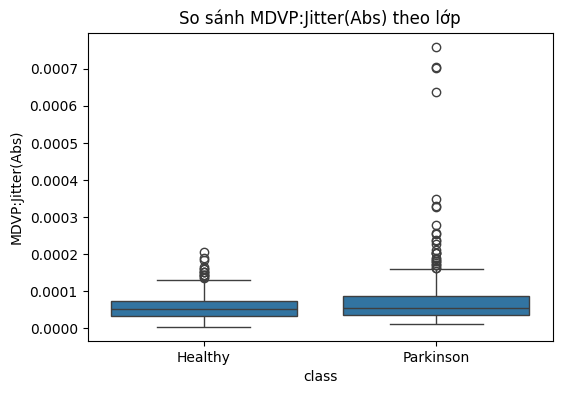

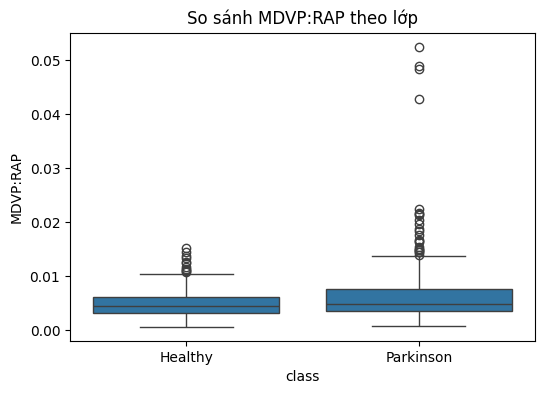

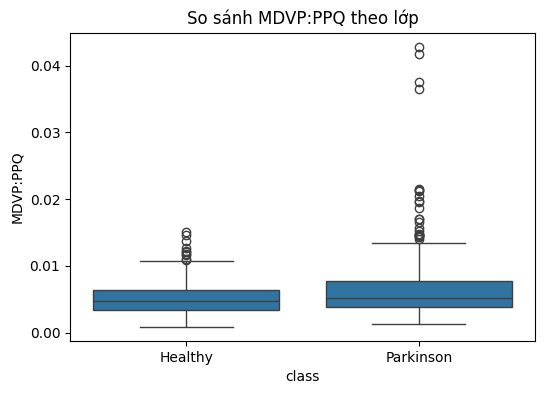

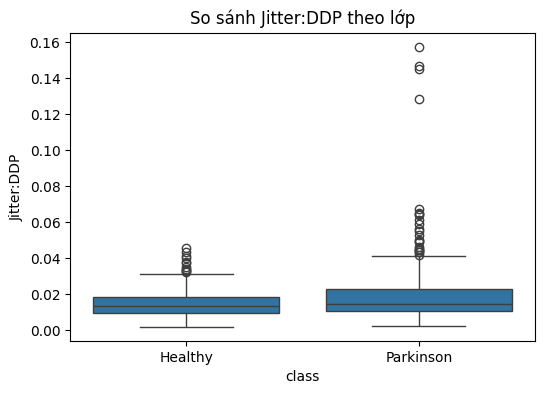

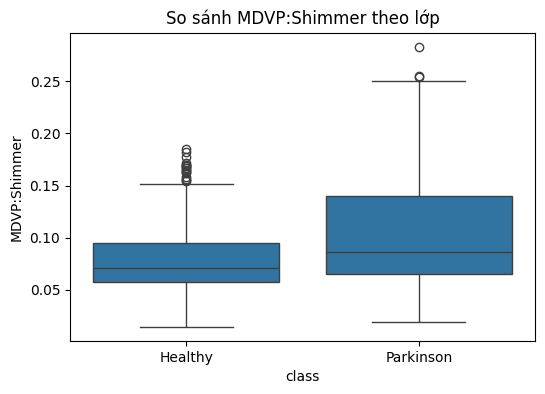

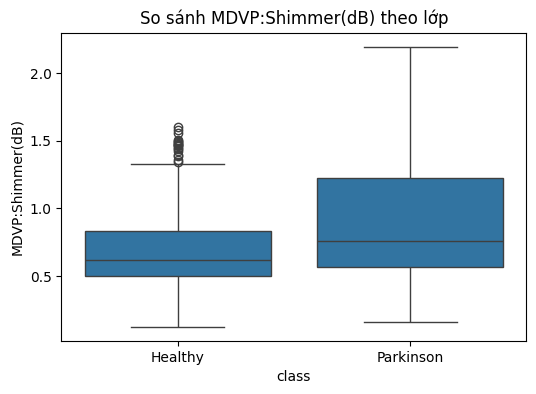

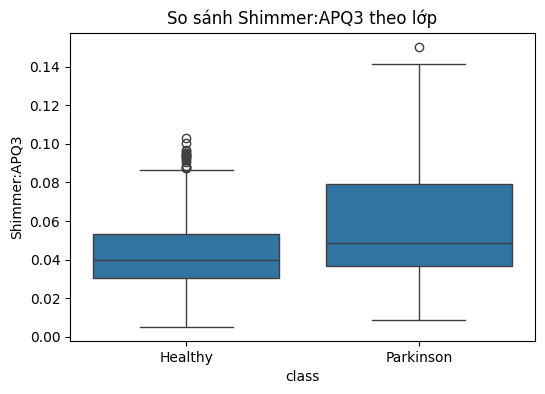

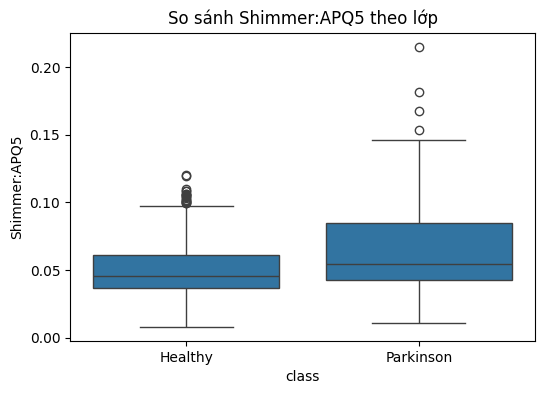

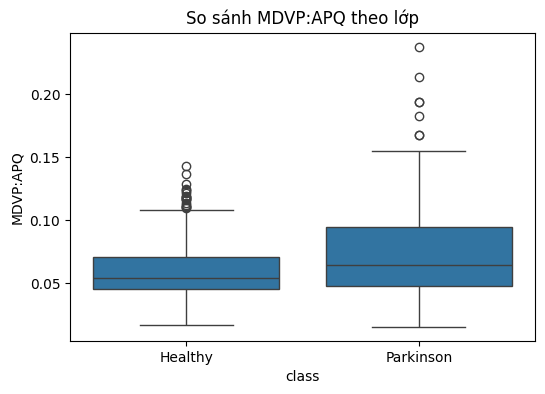

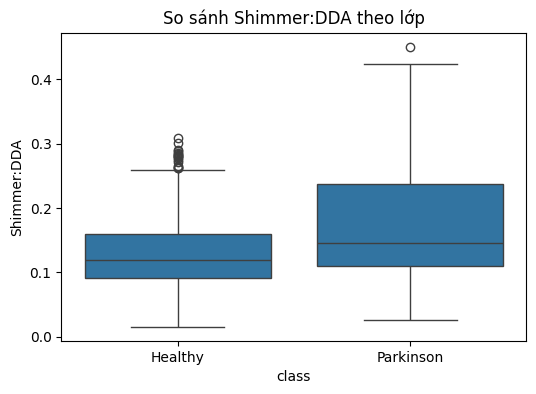

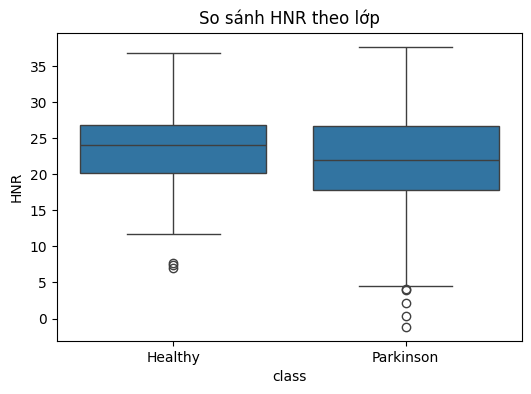

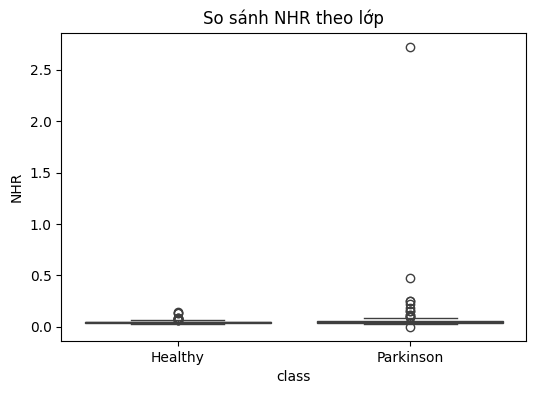

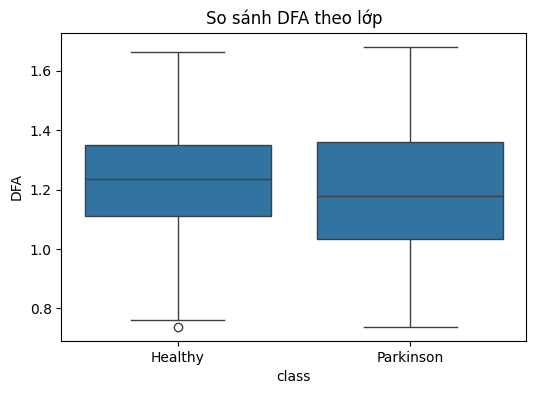

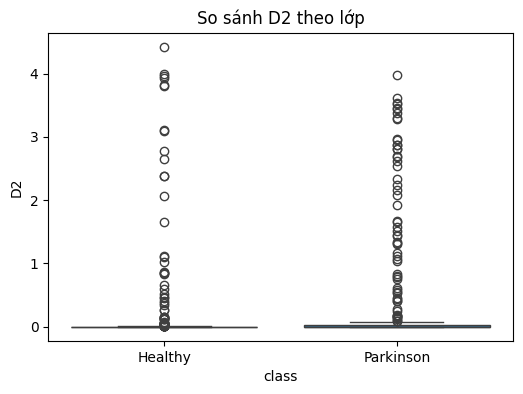

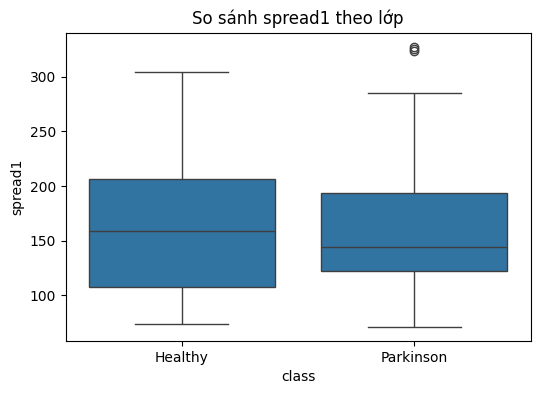

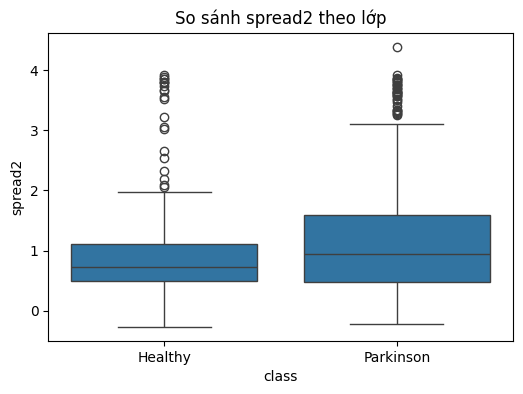

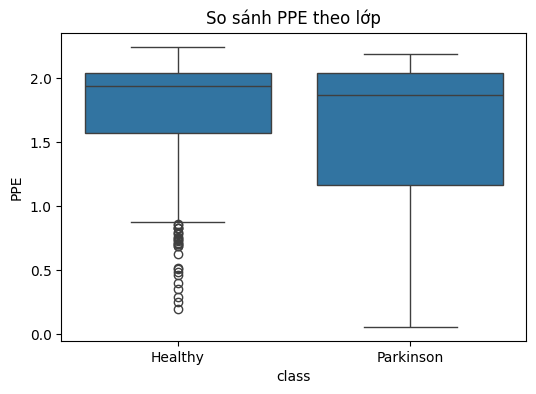

In [4]:
# Sau khi reset, cần import lại và load lại dữ liệu

# Load lại file
file_path = "../data/extracted_features.csv"
df = pd.read_csv(file_path)

# Loại bỏ cột id
df_viz = df.drop(columns=["id"])

# 1. Biểu đồ phân phối của một vài đặc trưng quan trọng
features_to_plot = ["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", 
                    "MDVP:Jitter(%)", "MDVP:Jitter(Abs)", "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP", 
                    "MDVP:Shimmer", "MDVP:Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA", 
                    "HNR", "NHR", "DFA", "D2", "spread1", "spread2", "PPE"]

for col in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df_viz, x=col, hue="class", kde=True, element="step")
    plt.title(f"Phân phối của {col} theo lớp (0=Healthy, 1=Parkinson)")
    plt.show()

# 2. Heatmap - Ma trận tương quan
plt.figure(figsize=(14,10))
corr = df_viz.drop(columns=["class"]).corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Ma trận tương quan giữa các đặc trưng")
plt.show()

# 3. Boxplot so sánh Healthy vs Parkinson cho một số đặc trưng
for col in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_viz, x="class", y=col)
    plt.title(f"So sánh {col} theo lớp")
    plt.xticks([0,1], ["Healthy", "Parkinson"])
    plt.show()


In [ ]:
# %% [markdown]
# # Quy Trình Tiền Xử Lý Dữ Liệu Toàn Diện
# 
# ## Tóm tắt các bước:
# 1.  **Tải Dữ Liệu Gốc:** Đọc tệp `extracted_features.csv`.
# 2.  **Bước 1: Xử Lý Dữ Liệu Thiếu:** Lấp đầy các giá trị `NaN` bằng phương pháp trung bình.
# 3.  **Bước 2: Xử Lý Giá Trị Ngoại Lai (Outliers):** Áp dụng phương pháp Clipping (IQR) để giới hạn các giá trị bất thường.
# 4.  **Bước 3: Lựa Chọn Đặc Trưng:** Loại bỏ các cột không cần thiết (`id`) và các cột có tính đa cộng tuyến cao.
# 5.  **Lưu Kết Quả Cuối Cùng:** Lưu DataFrame đã được xử lý hoàn chỉnh vào tệp mới.

# %%
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %% [markdown]
# ### Tải Dữ Liệu Gốc

# %%
# Đường dẫn đến tệp dữ liệu gốc
file_path = '../data/combined_data.csv'

try:
    df = pd.read_csv(file_path)
    print(f"✅ Tải thành công dữ liệu gốc. Kích thước ban đầu: {df.shape}")
except FileNotFoundError:
    print(f"❌ Lỗi: Không tìm thấy tệp '{file_path}'. Vui lòng kiểm tra lại.")
    exit()

# %% [markdown]
# ### Bước 1: Xử Lý Dữ Liệu Thiếu

# %%
if 'MDVP:APQ' in df.columns and df['MDVP:APQ'].isnull().any():
    mean_apq = df['MDVP:APQ'].mean()
    df['MDVP:APQ'].fillna(mean_apq, inplace=True)
    print("✅ Đã xử lý giá trị thiếu trong cột 'MDVP:APQ'.")
else:
    print("ℹ️ Không có giá trị thiếu trong cột 'MDVP:APQ'.")


# %% [markdown]
# ### Bước 2: Xử Lý Giá Trị Ngoại Lai (Outliers)

# %%
# Chọn các cột số để xử lý (trừ cột target 'class')
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
if 'class' in numerical_features:
    numerical_features.remove('class')

# print("Bắt đầu xử lý outlier...")
# for col in numerical_features:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# print("✅ Đã xử lý xong outlier.")

# %% [markdown]
# ### Bước 3: Lựa Chọn Đặc Trưng

# %%
# Các cột được xác định là dư thừa dựa trên phân tích tương quan
features_to_drop = [
    'MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'MDVP:RAP', 'spread1', 'Shimmer:APQ5', 
    'MDVP:APQ', 'Shimmer:DDA', 'MDVP:PPQ', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'HNR'
]

# Thêm cột 'id' vào danh sách cần bỏ
features_to_drop.append('id')

# Loại bỏ các cột
df_final = df.drop(columns=features_to_drop, errors='ignore')

print("✅ Đã loại bỏ các cột không cần thiết và các cột đa cộng tuyến.")
print(f"Số cột đã loại bỏ: {len(features_to_drop)}")


# %% [markdown]
# ### Bước 4: Kiểm Tra và Lưu Kết Quả Cuối Cùng

# %%
print("\n--- Dữ Liệu Cuối Cùng Sau Khi Xử Lý ---")
print(f"Kích thước cuối cùng: {df_final.shape}")
print("\nCác cột được giữ lại:")
print(df_final.columns.tolist())

# Lưu tệp CSV cuối cùng
final_file_path = '../data/final_selected_features.csv'
df_final.to_csv(final_file_path, index=False)

print(f"\n🎉 Hoàn tất! Dữ liệu đã được xử lý toàn diện và lưu vào tệp '{final_file_path}'.")

❌ Lỗi: Không tìm thấy tệp '../data/combined_data.csv'. Vui lòng kiểm tra lại.
✅ Đã xử lý giá trị thiếu trong cột 'MDVP:APQ'.
✅ Đã loại bỏ các cột không cần thiết và các cột đa cộng tuyến.
Số cột đã loại bỏ: 12

--- Dữ Liệu Cuối Cùng Sau Khi Xử Lý ---
Kích thước cuối cùng: (621, 11)

Các cột được giữ lại:
['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'Jitter:DDP', 'Shimmer:APQ3', 'NHR', 'DFA', 'D2', 'spread2', 'PPE', 'class']

🎉 Hoàn tất! Dữ liệu đã được xử lý toàn diện và lưu vào tệp '../data/final_selected_features.csv'.


C:\Users\phamh\AppData\Local\Temp\ipykernel_2520\296288377.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MDVP:APQ'].fillna(mean_apq, inplace=True)


: 